### Notebook to run model comparision and plots

In [60]:
import numpy as np
import os
import pickle
import  matplotlib.pyplot as plt

In [61]:
NLSDT_RESULTS_PATH = "/NeuroLS_DecisionTransformer/experiment_outputs/nlsdt/15x15/1/"
NLS_RESULTS_PATH = "/NeuroLS_DecisionTransformer/experiment_outputs/nls/15x15/1"

In [62]:
def hamming_distance(sequence1, sequence2):
    counter = 0
    for i in range(len(sequence1)):
        if sequence1[i] != sequence2[i]: counter += 1
    return counter


def start_time_distance(dt, nls):
    sum = 0
    for i in range(len(nls)):
        sum += abs(dt[i]*100 - nls[i]*100)
    return sum/len(nls)

def get_dt_schedules():
    dt_schedules = {}
    dt_schedules[1] = {}
    for filename in os.scandir(NLSDT_RESULTS_PATH):
        if os.path.splitext(filename)[1] == ".npy":
            sequence_data  = np.load(filename, allow_pickle=True)
            dt_schedules[1][filename.name[0:-4]] = sequence_data
    return dt_schedules

def get_nls_schedules():
    no_dt_schedules = {}
    for filename in os.scandir(NLS_RESULTS_PATH):
        if os.path.splitext(filename)[1] == ".npy":
            sequence_data = np.load(filename, allow_pickle=True)
            no_dt_schedules[filename.name[0:-4]] = sequence_data
    return no_dt_schedules

def calculate_percentage(data):
    total = sum(data)
    percentages = [(x / total)  for x in data]
    return percentages

In [63]:
import matplotlib
dt_schedules = get_dt_schedules()[1]
nls_schedules = get_nls_schedules()
action_count_nls = np.zeros(10)
action_count_nlsdt = np.zeros(10)
counter = 0


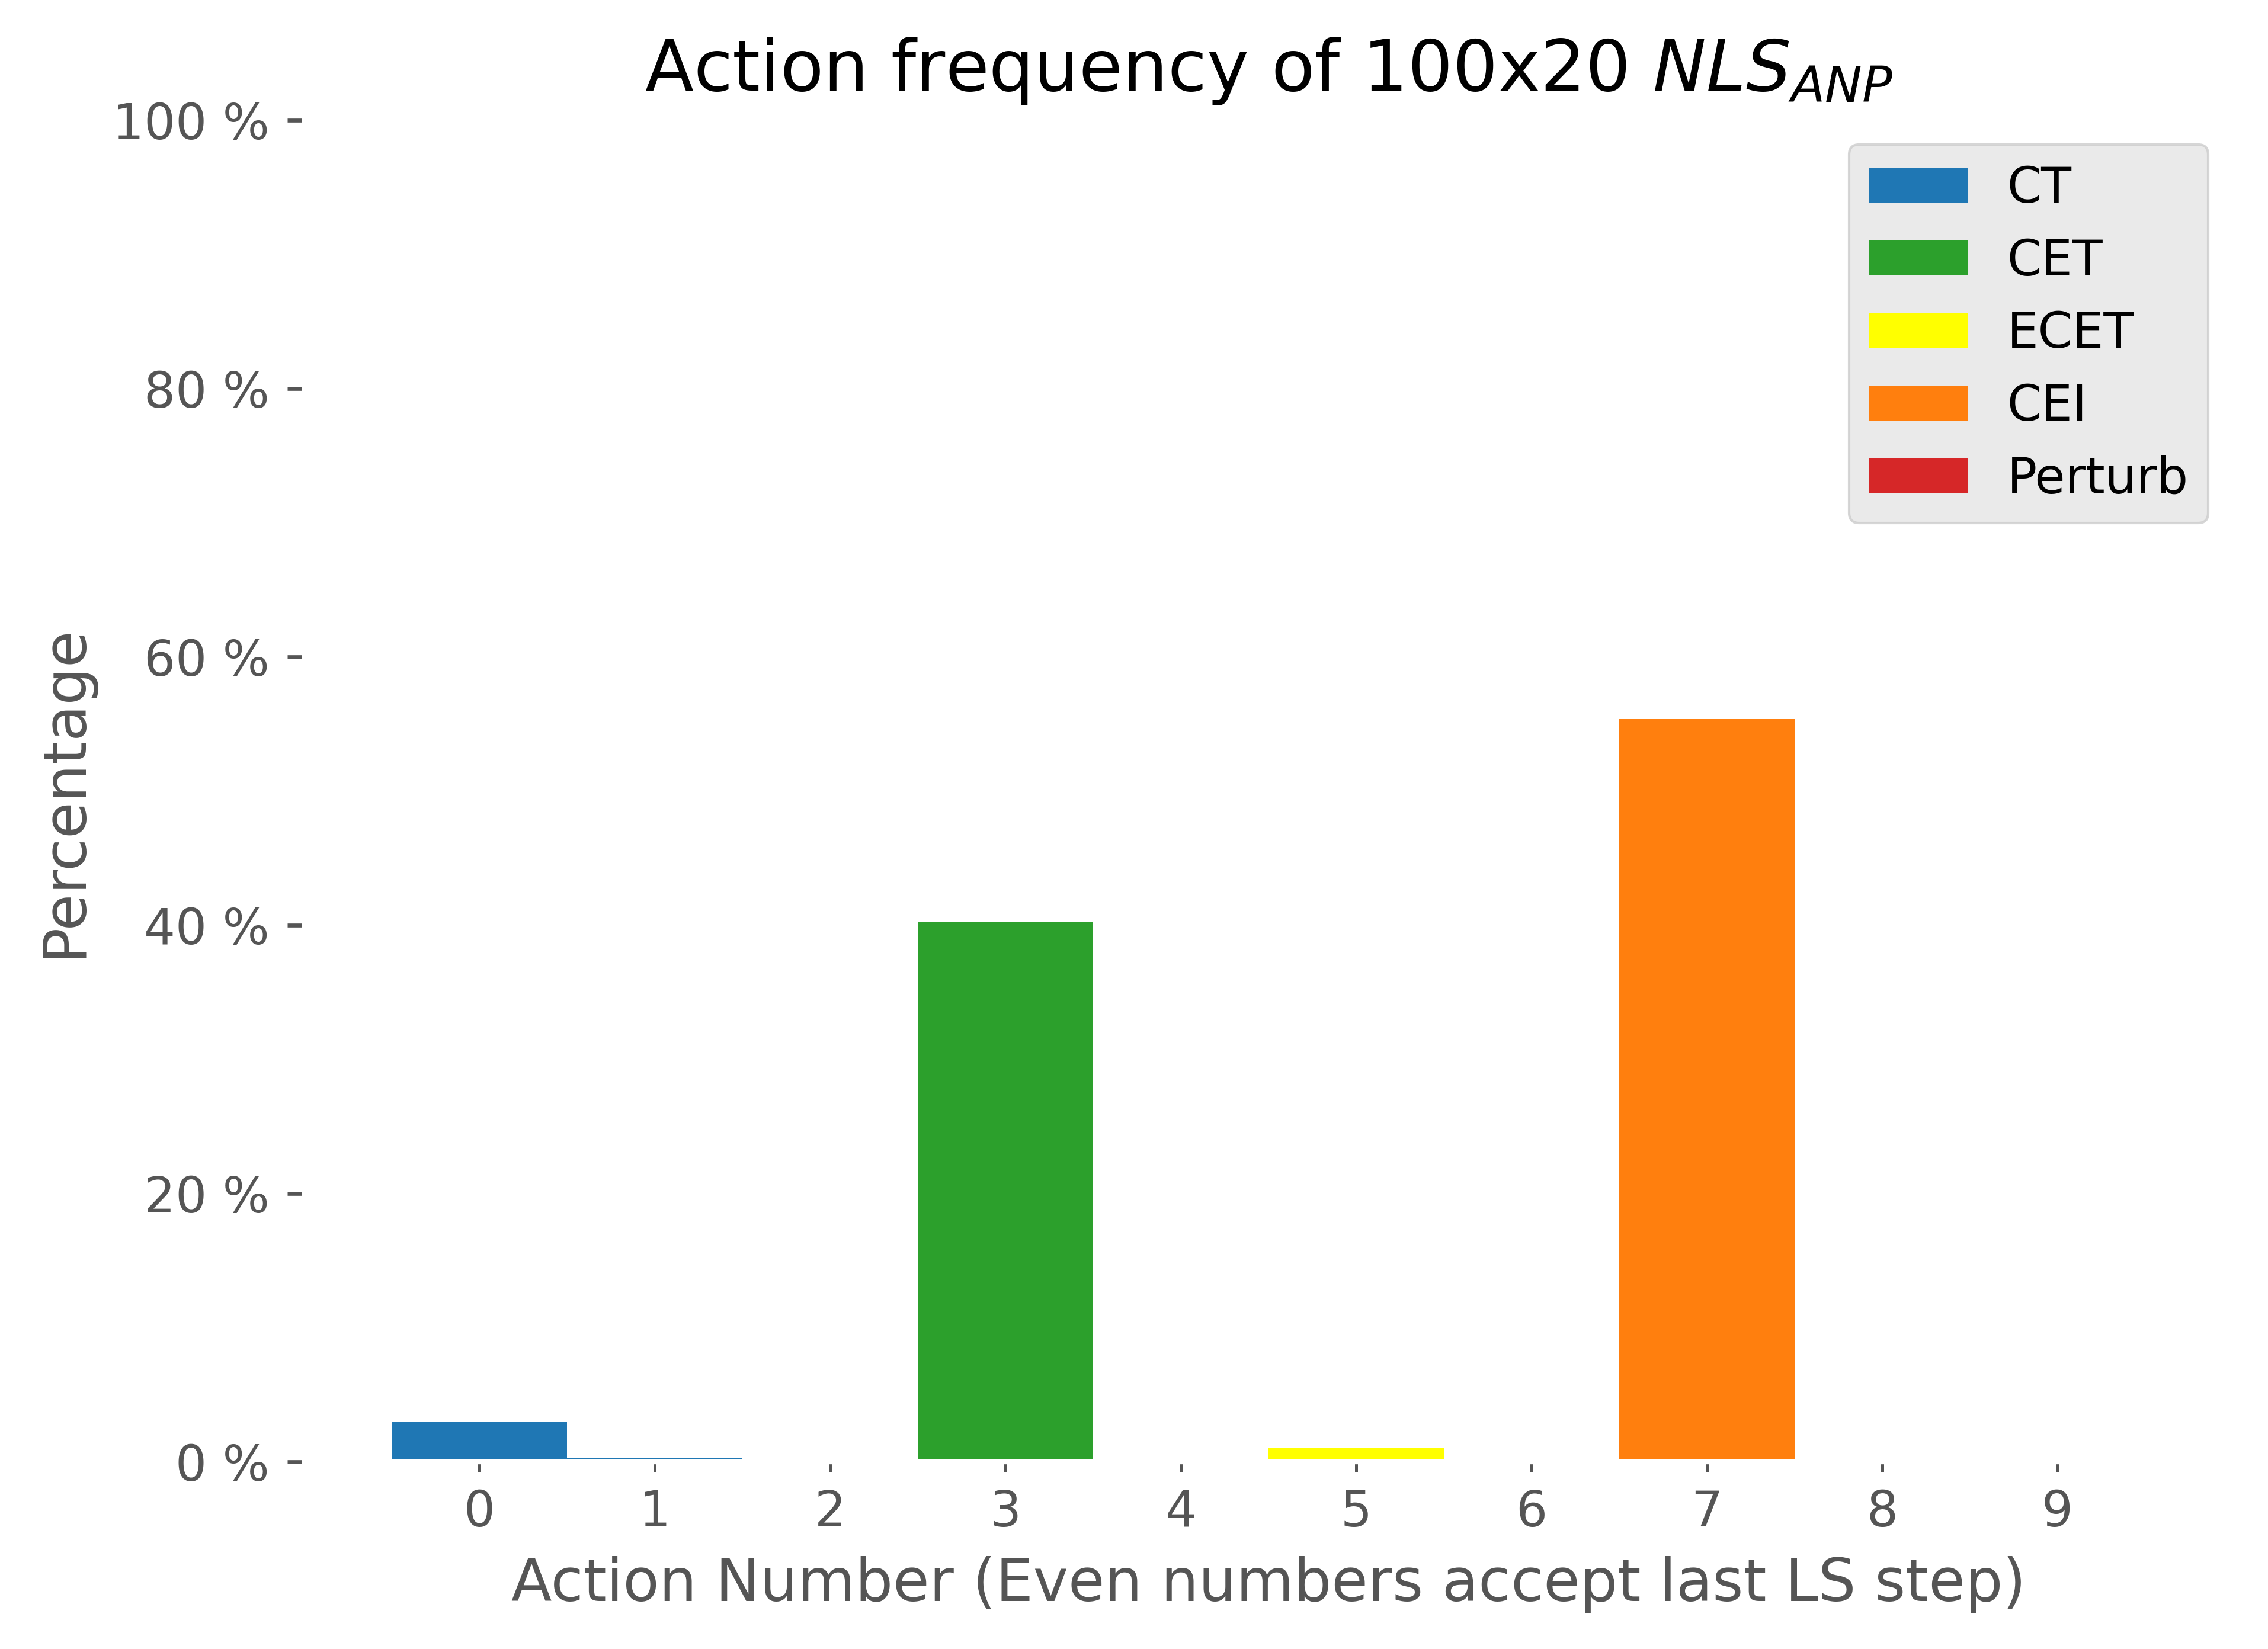

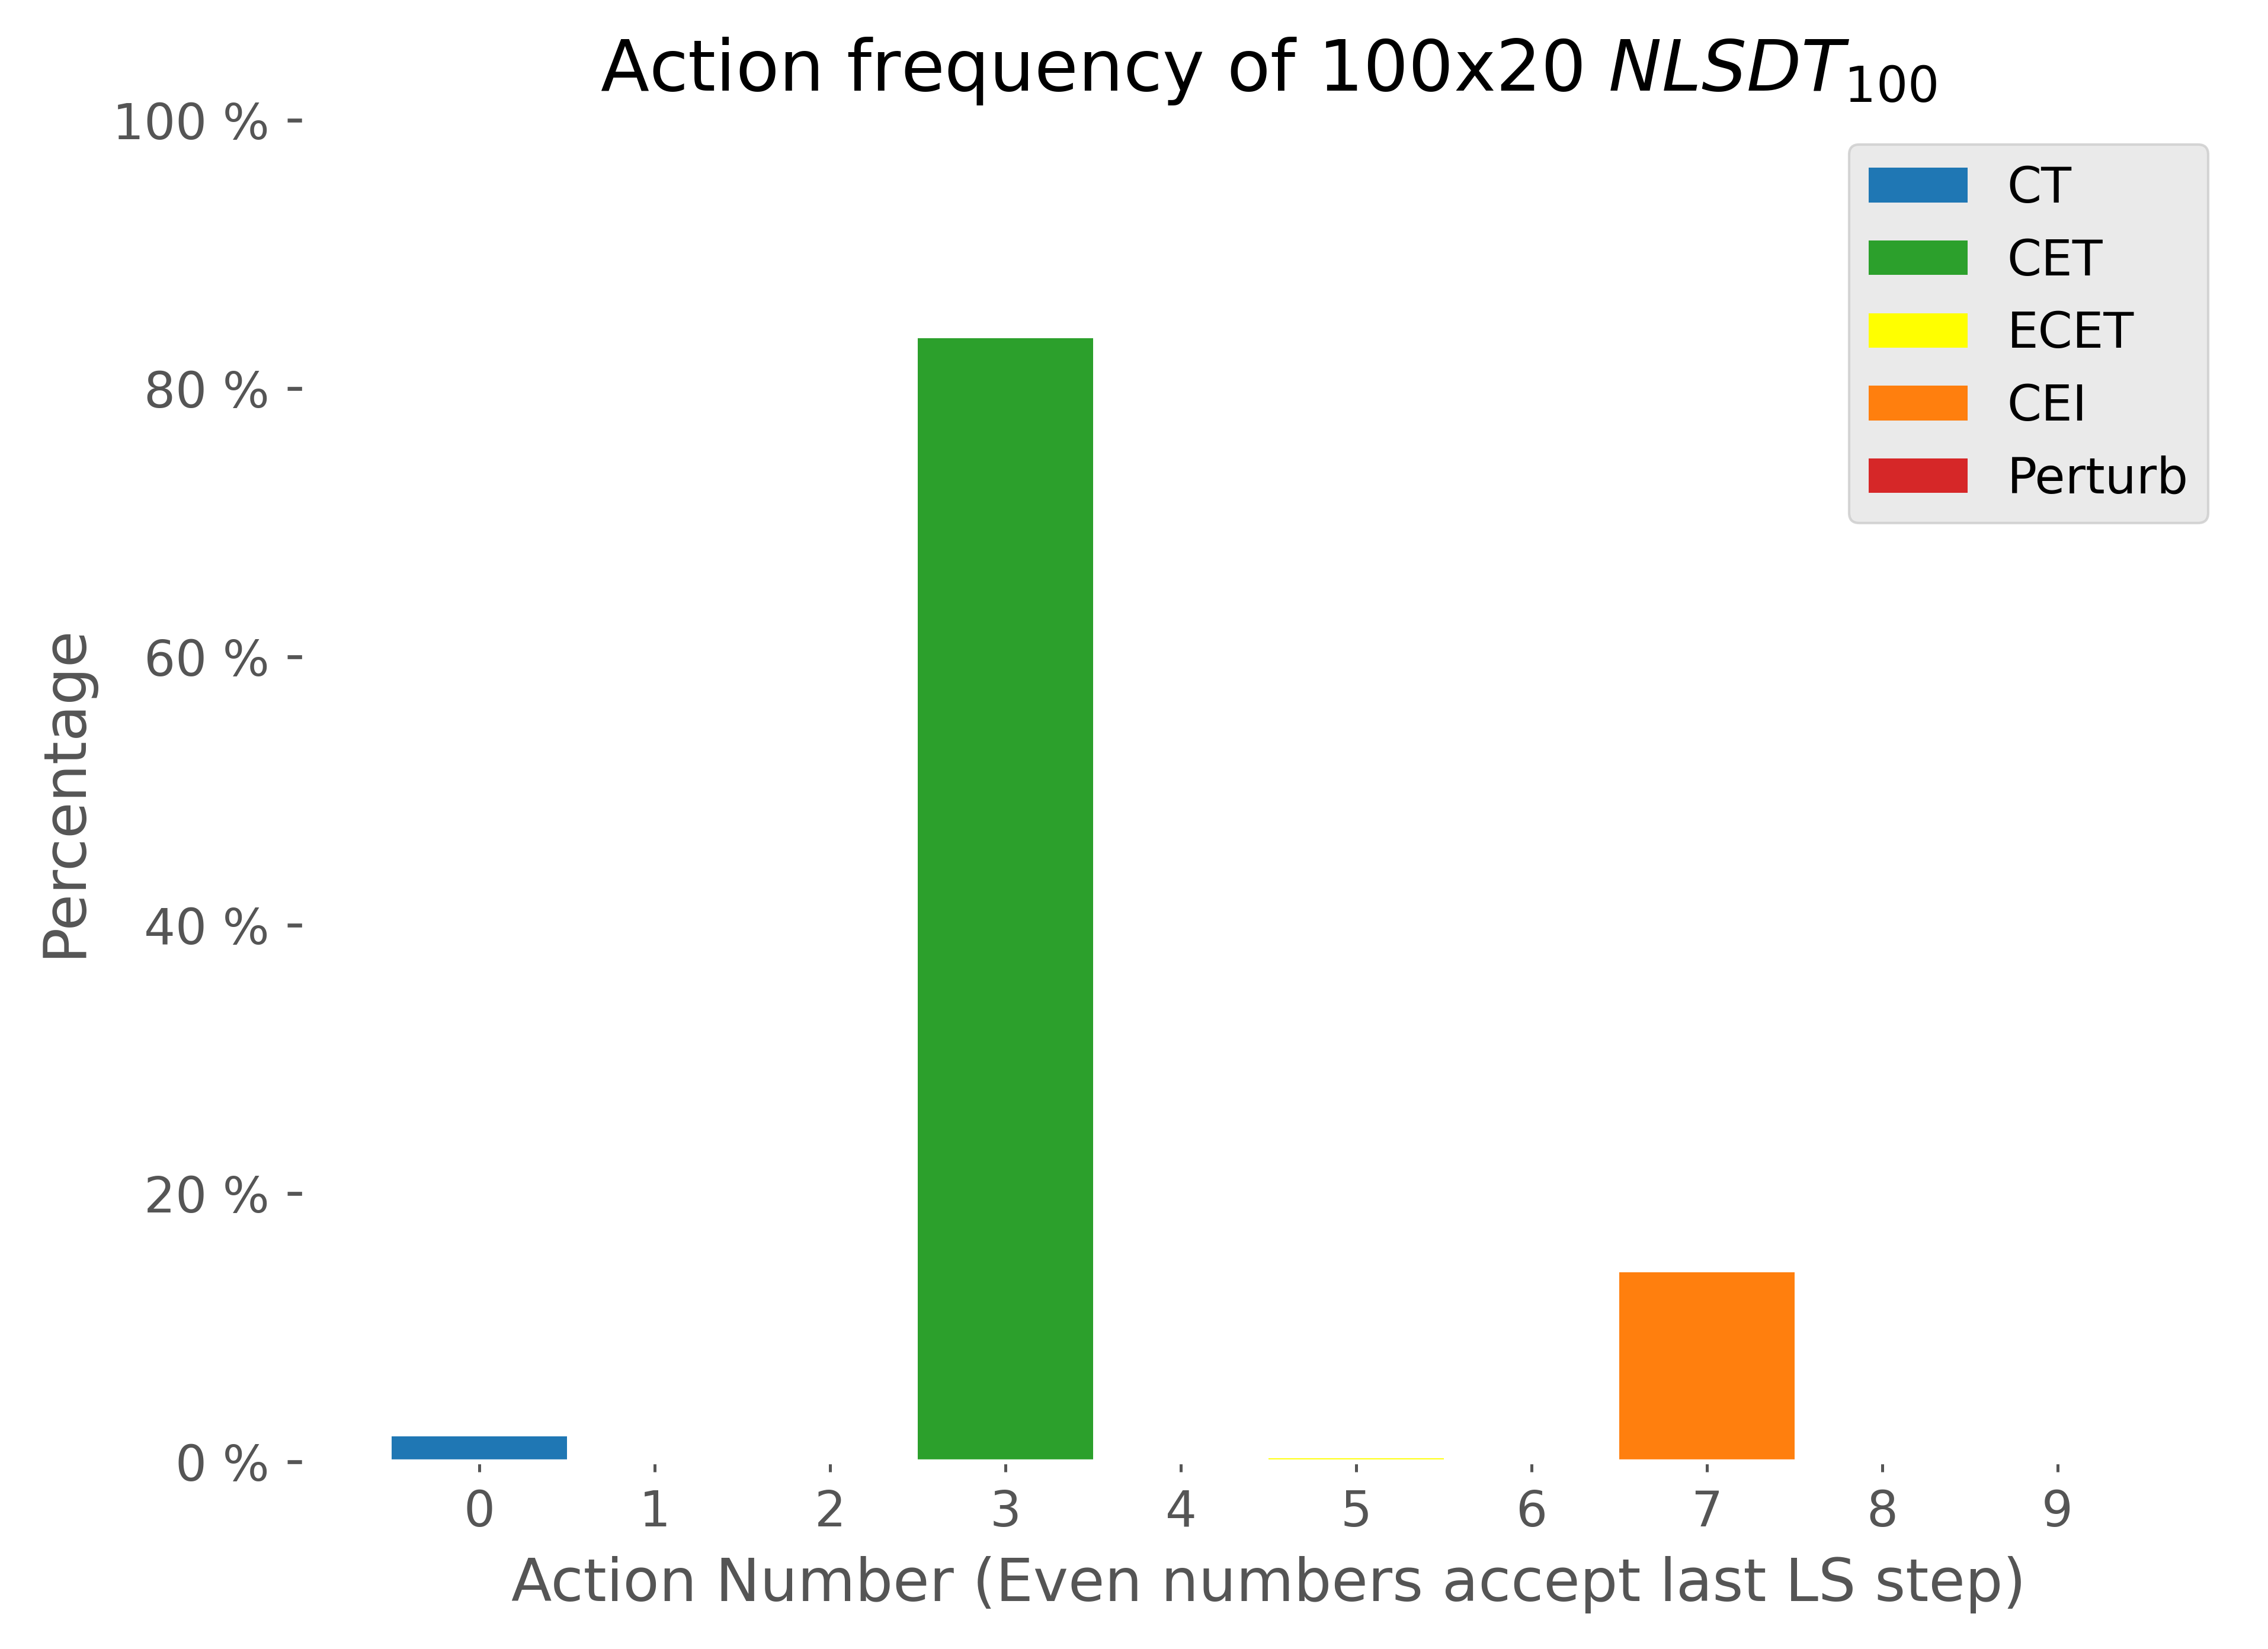

In [64]:
for schedule in nls_schedules:
    #if counter > 3: break;
    counter += 1
    for action_index in range(len(nls_schedules[schedule][2])):
        if schedule in dt_schedules:
            nls_selected_action = nls_schedules[schedule][2][action_index][0]
            action_count_nls[nls_selected_action] += 1
            nlsdt_selected_action = dt_schedules[schedule][2][action_index][0]
            action_count_nlsdt[nlsdt_selected_action] += 1

plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
plt.stairs(calculate_percentage(action_count_nls)[:3], np.arange(11)[:4], fill=True, color="tab:blue", label="CT")
plt.stairs(calculate_percentage(action_count_nls)[3:5], np.arange(11)[3:6], fill=True, color="tab:green", label="CET")
plt.stairs(calculate_percentage(action_count_nls)[5:7], np.arange(11)[5:8], fill=True, color="yellow", label="ECET")
plt.stairs(calculate_percentage(action_count_nls)[7:9], np.arange(11)[7:10], fill=True, color="tab:orange", label="CEI")
plt.stairs(calculate_percentage(action_count_nls)[9:], np.arange(11)[9:], fill=True, color="tab:red", label="Perturb")
plt.legend(loc="upper right")
plt.title(r"Action frequency of 100x20 $NLS_{ANP}$")
ax.set_ylim(0, 1.0)
ax.set_xticklabels('')
# Customize minor tick labels
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,],      minor=True)
ax.set_xticklabels(['0','1','2','3','4','5','6','7','8','9'], minor=True)
ax.tick_params(axis='x', which='major', tick1On=False, tick2On=False)
plt.xlabel("Action Number (Even numbers accept last LS step)")
plt.ylabel("Percentage")
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0,symbol=" %"))
plt.savefig("acFreq100.png")

plt.show()
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
plt.stairs(calculate_percentage(action_count_nlsdt)[:3], np.arange(11)[:4], fill=True, color="tab:blue", label="CT")
plt.stairs(calculate_percentage(action_count_nlsdt)[3:5], np.arange(11)[3:6], fill=True, color="tab:green", label="CET")
plt.stairs(calculate_percentage(action_count_nlsdt)[5:7], np.arange(11)[5:8], fill=True, color="yellow", label="ECET")
plt.stairs(calculate_percentage(action_count_nlsdt)[7:9], np.arange(11)[7:10], fill=True, color="tab:orange", label="CEI")
plt.stairs(calculate_percentage(action_count_nlsdt)[9:], np.arange(11)[9:], fill=True, color="tab:red", label="Perturb")
ax.set_xticklabels('')
# Customize minor tick labels
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,],      minor=True)
ax.set_xticklabels(['0','1','2','3','4','5','6','7','8','9'], minor=True)
ax.tick_params(axis='x', which='major', tick1On=False, tick2On=False)
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0,symbol=" %"))
ax.set_ylim(0, 1.0)
plt.xlabel("Action Number (Even numbers accept last LS step)")
plt.ylabel("Percentage")
plt.legend(loc="upper right")
plt.title(r"Action frequency of 100x20 $NLSDT_{100}$")
plt.savefig("acFreq100Dt.png")
plt.show()

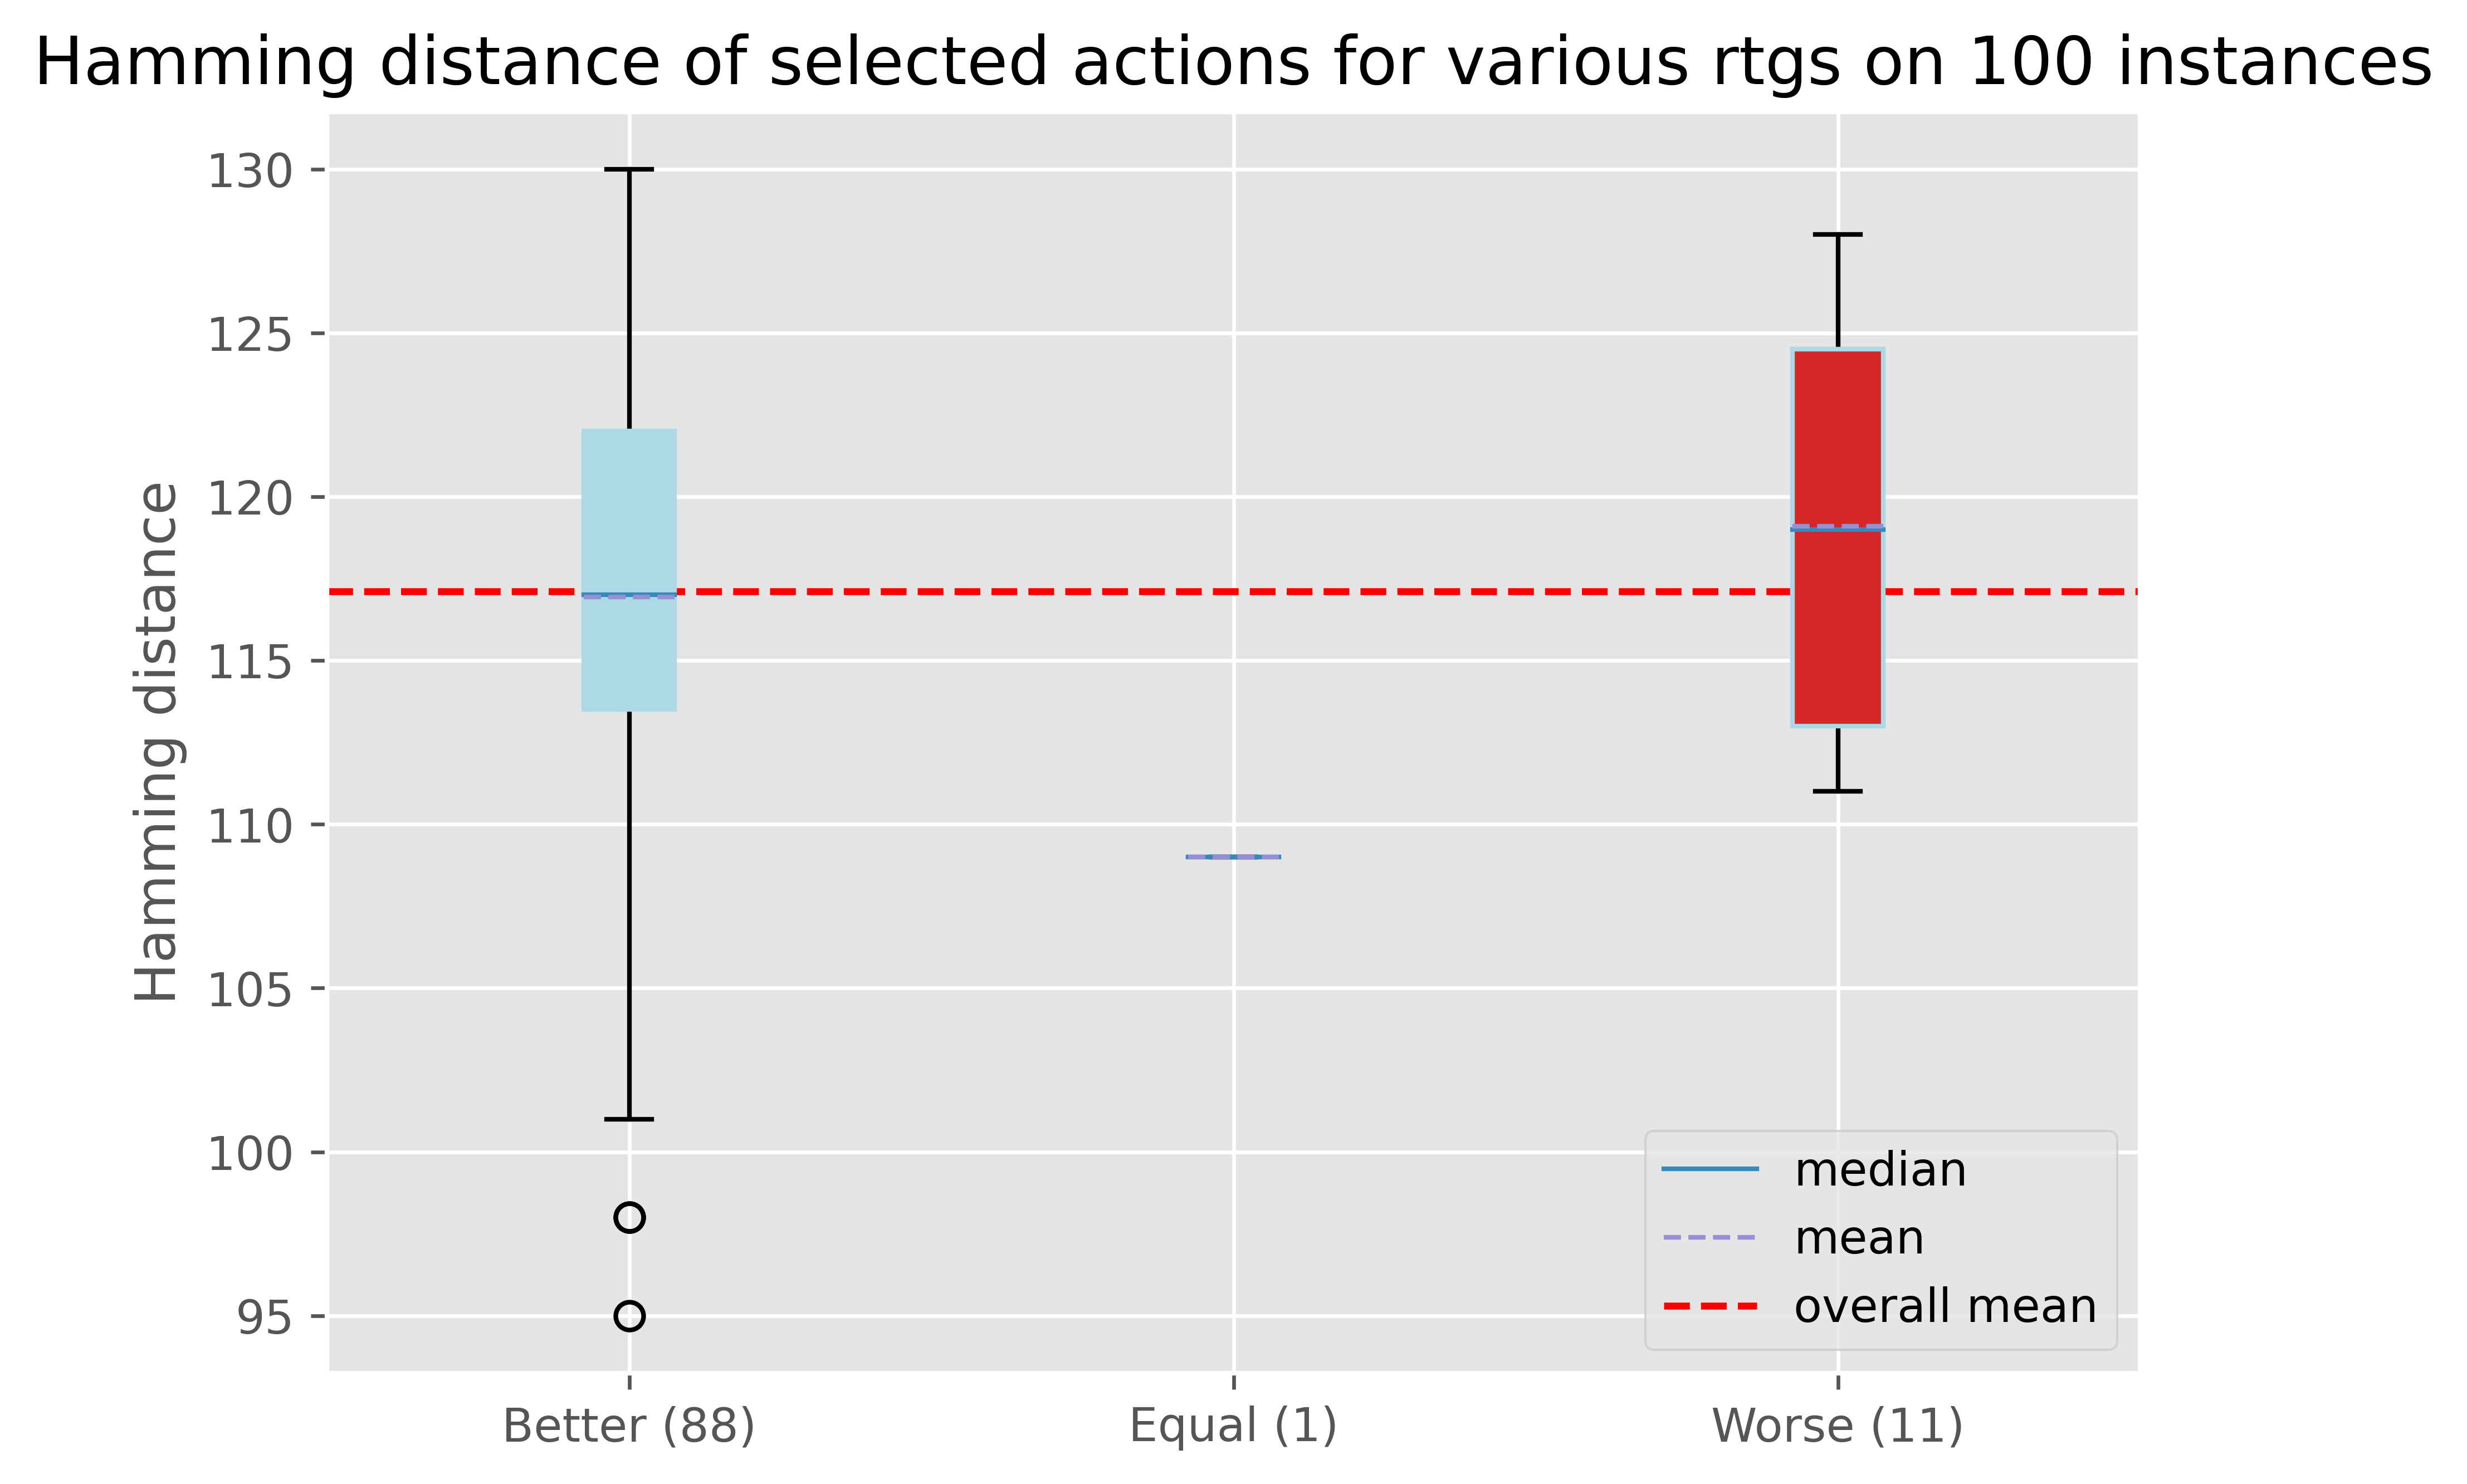

117.1010101010101


In [65]:

def calc_distance_better_and_worse(actions = False):
    schedule_index = 2 if actions else 1 # defines if the Hamming distance should be calculated for the machine sequences or for the action sequences
    dist_string= "selected actions" if actions else "machine sequences"
    mean_distance = {}
    dt_schedules = get_dt_schedules()
    nls_schedules = get_nls_schedules()
    os.chdir("/mnt/c/Users/fabia/OneDrive/MyUni/Masterarbeit/NeuroLS_DecisionTransformer/")

    mean_distance_eq = []
    mean_distance_better = []
    mean_distance_worse = []
    for schedule_id in dt_schedules[1]:
        if schedule_id in nls_schedules:
            dt_vals = np.asarray(dt_schedules[1][schedule_id][schedule_index]).flatten()
            nls_valse = np.asarray(nls_schedules[schedule_id][schedule_index]).flatten()
            if nls_schedules[schedule_id][3] > dt_schedules[1][schedule_id][3]:
                mean_distance_better.append(hamming_distance(dt_vals, nls_valse))
            elif nls_schedules[schedule_id][3] < dt_schedules[1][schedule_id][3]:
                mean_distance_worse.append(hamming_distance(dt_vals, nls_valse))
            else:
                mean_distance_eq.append(hamming_distance(dt_vals, nls_valse))


    plt.rcParams["figure.figsize"] = (7, 5)
    plt.rcParams['figure.dpi'] = 600
    plt.rcParams['savefig.dpi'] = 600
    fig, ax = plt.subplots()
    bp1 = ax.boxplot(mean_distance_better, positions=[1], meanline=True, showmeans=True, patch_artist=True, boxprops=dict(facecolor="lightblue", color="lightblue"))

    # Boxplot for mean_distance_eq
    bp2 = ax.boxplot(mean_distance_eq, positions=[2], meanline=True, showmeans=True, patch_artist=True, boxprops=dict(facecolor="tab:red", color="lightblue"))

    # Boxplot for mean_distance_worse
    bp3 = ax.boxplot(mean_distance_worse, positions=[3], meanline=True, showmeans=True, patch_artist=True, boxprops=dict(facecolor="tab:red", color="lightblue"))

    l = plt.axhline(y=np.mean(mean_distance_worse + mean_distance_better + mean_distance_eq), color='red',
                linestyle='--', label='Overall Mean')

    # Adjust x-axis labels if needed
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels([f'Better ({len(mean_distance_better)+1})', f'Equal ({len(mean_distance_eq)})', f'Worse ({len(mean_distance_worse)})'])
    plt.grid(True)
    plt.title(f"Hamming distance of {dist_string} for various rtgs on 100 instances")
    plt.legend([bp1['medians'][0], bp1['means'][0], l], ['median', 'mean', 'overall mean'])
    plt.ylabel('Hamming distance')
    plt.savefig(f'Hamming{actions}_15x15.png')
    plt.show()
    print(np.mean(mean_distance_worse + mean_distance_better + mean_distance_eq))
calc_distance_better_and_worse(True)

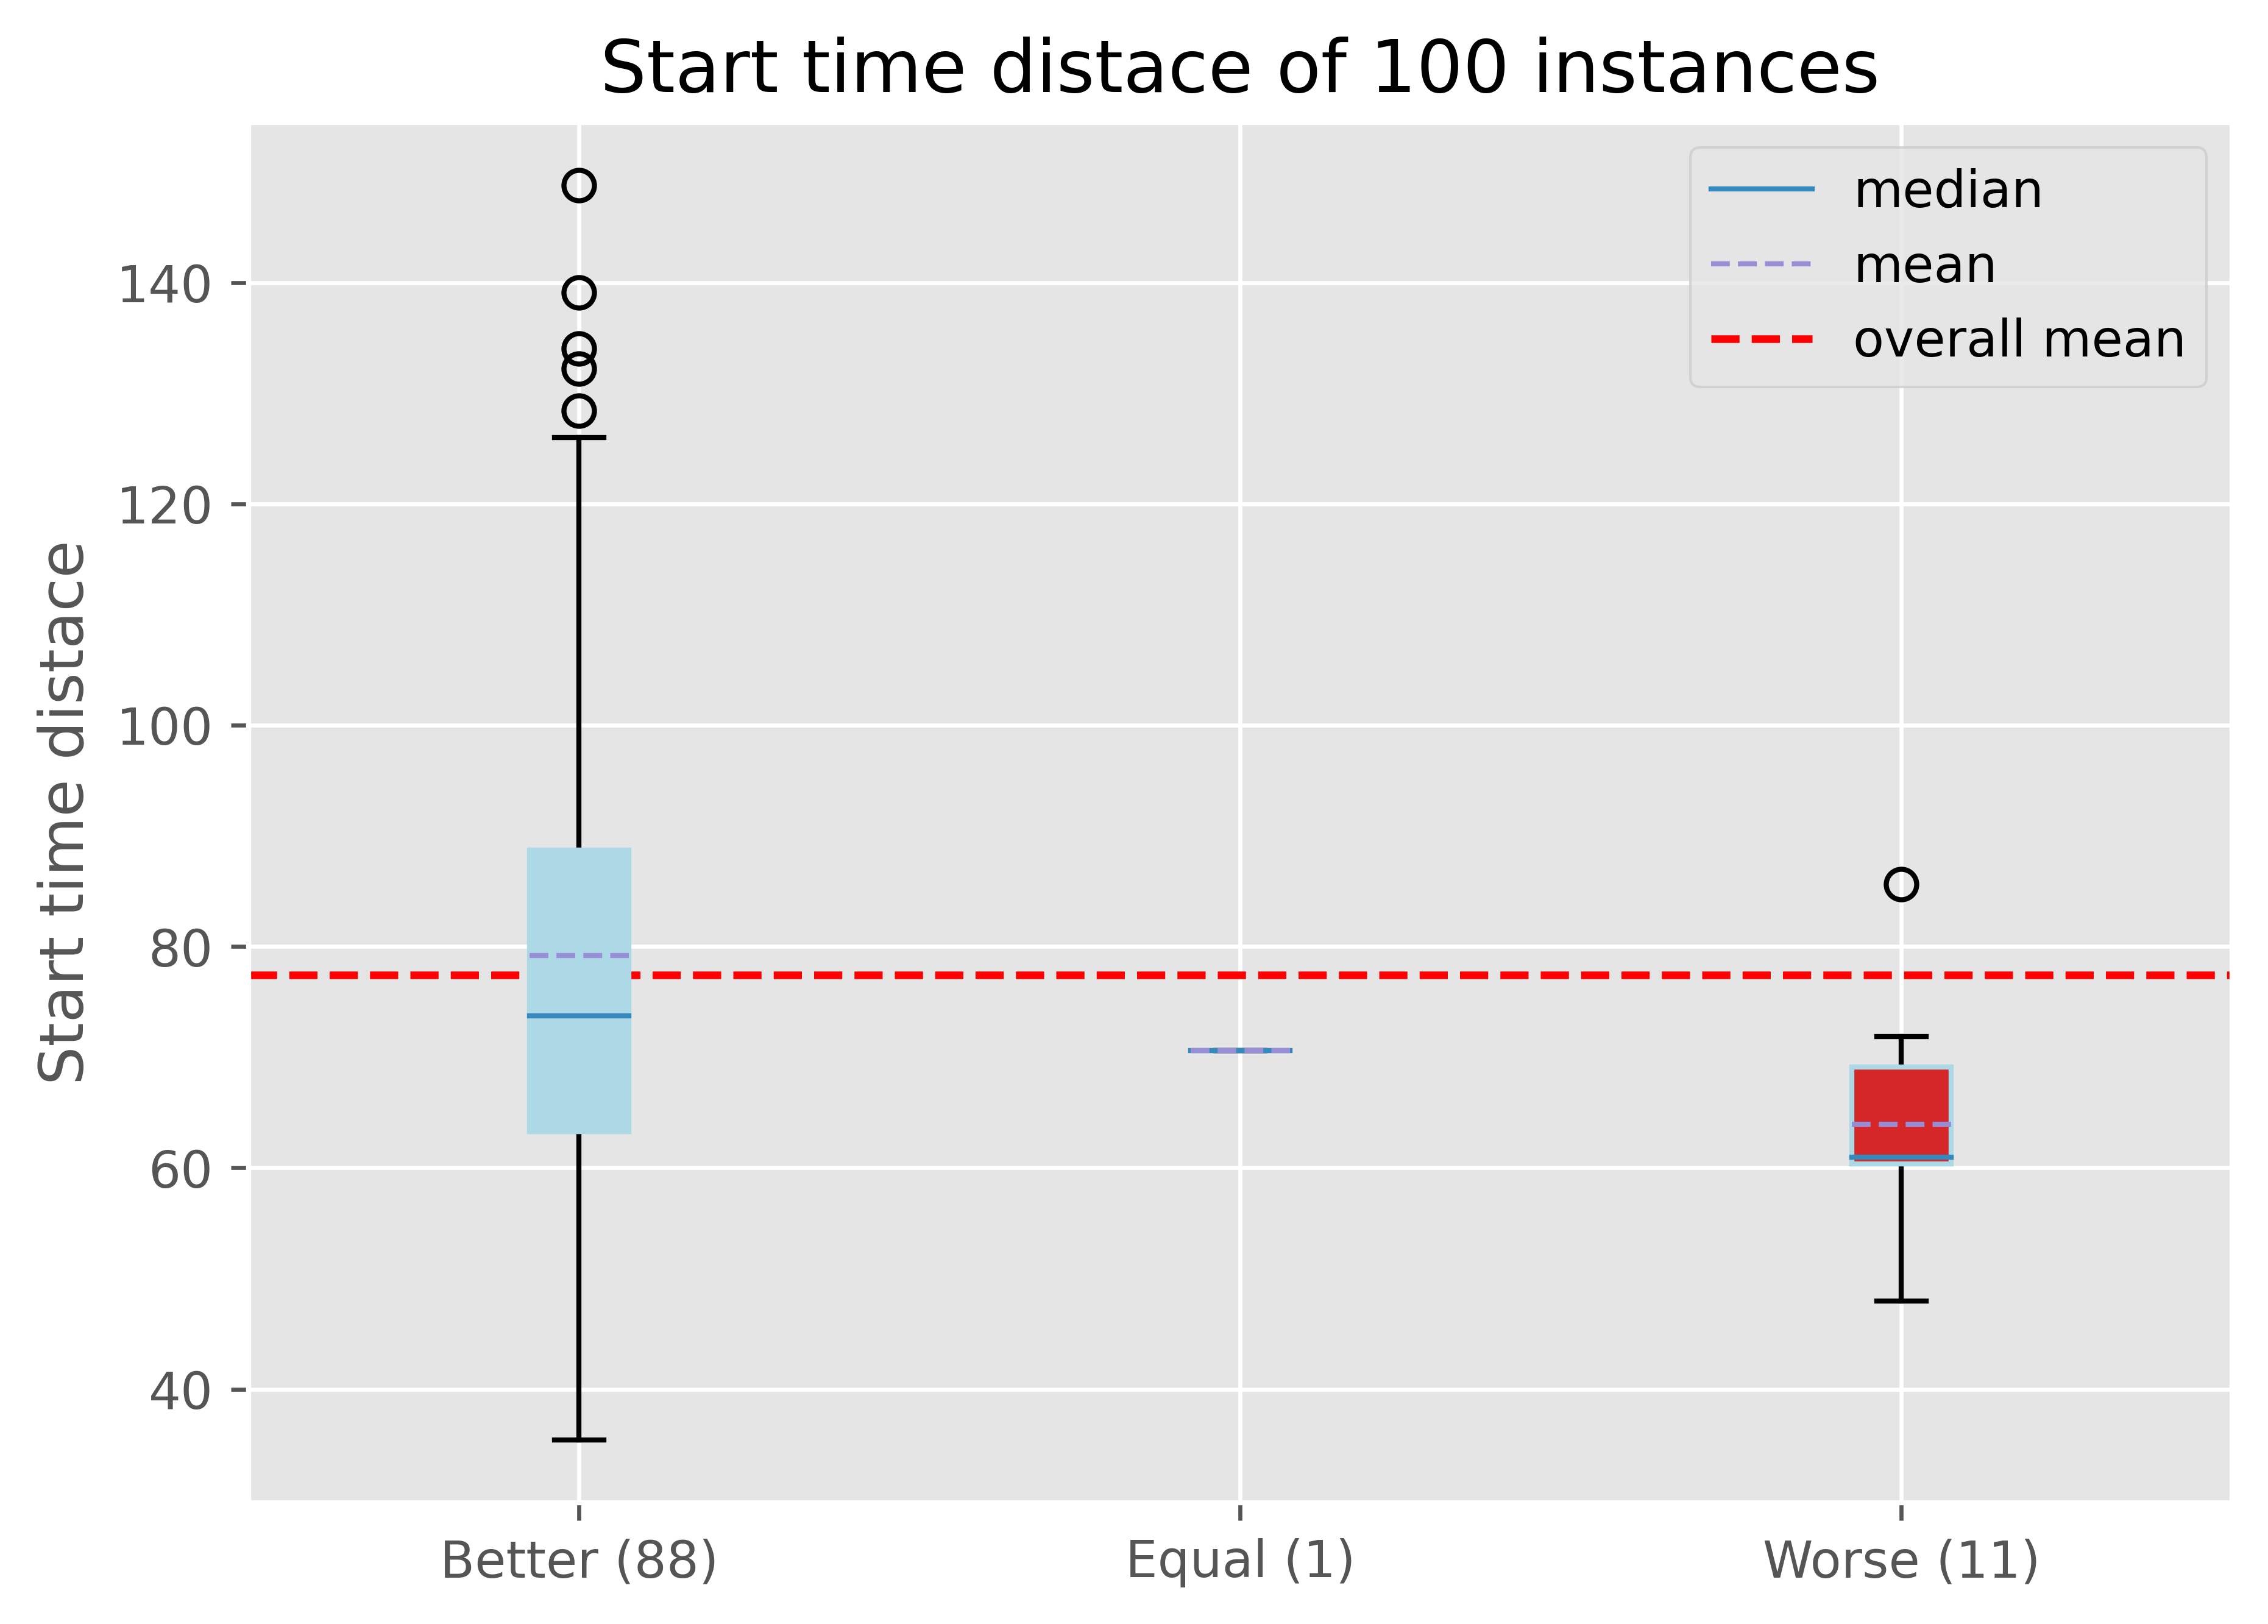

77.40832772447


In [66]:
def calc_distance_better_and_worse_std(actions = 0):
    schedule_index = 0# defines if the Hammingg distance should be calculated for the machine sequences or for the action sequences
    mean_distance = {}
    dt_schedules = get_dt_schedules()
    nls_schedules = get_nls_schedules()
    os.chdir("/mnt/c/Users/fabia/OneDrive/MyUni/Masterarbeit/NeuroLS_DecisionTransformer/")

    mean_distance_eq = []
    mean_distance_better = []
    mean_distance_worse = []
    for schedule_id in dt_schedules[1]:
        if schedule_id in nls_schedules:
            dt_vals = np.asarray(dt_schedules[1][schedule_id][schedule_index]).flatten()
            nls_valse = np.asarray(nls_schedules[schedule_id][schedule_index]).flatten()
            if nls_schedules[schedule_id][3] > dt_schedules[1][schedule_id][3]:
                mean_distance_better.append(start_time_distance(dt_vals, nls_valse))
            elif nls_schedules[schedule_id][3] < dt_schedules[1][schedule_id][3]:
                mean_distance_worse.append(start_time_distance(dt_vals, nls_valse))
            else:
                mean_distance_eq.append(start_time_distance(dt_vals, nls_valse))


    plt.rcParams["figure.figsize"] = (7, 5)
    plt.rcParams['figure.dpi'] = 600
    plt.rcParams['savefig.dpi'] = 600
    fig, ax = plt.subplots()
    bp1 = ax.boxplot(mean_distance_better, positions=[1], meanline=True, showmeans=True, patch_artist=True, boxprops=dict(facecolor="lightblue", color="lightblue"))

    # Boxplot for mean_distance_eq
    bp2 = ax.boxplot(mean_distance_eq, positions=[2], meanline=True, showmeans=True, patch_artist=True, boxprops=dict(facecolor="tab:red", color="lightblue"))

    # Boxplot for mean_distance_worse
    bp3 = ax.boxplot(mean_distance_worse, positions=[3], meanline=True, showmeans=True, patch_artist=True, boxprops=dict(facecolor="tab:red", color="lightblue"))

    l = plt.axhline(y=np.mean(mean_distance_worse + mean_distance_better + mean_distance_eq), color='red',
                linestyle='--', label='Overall Mean')
    # Adjust x-axis labels if needed
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels([f'Better ({len(mean_distance_better)+1})', f'Equal ({len(mean_distance_eq)})', f'Worse ({len(mean_distance_worse)})'])
    plt.grid(True)
    plt.title("Start time distace of 100 instances")
    plt.legend([bp1['medians'][0], bp1['means'][0], l], ['median', 'mean', 'overall mean'])
    plt.ylabel('Start time distace')
    plt.savefig(f'Start time distace{actions}_15x15.png')
    plt.show()
    print(np.mean(mean_distance_worse + mean_distance_better + mean_distance_eq))

calc_distance_better_and_worse_std(True)

### Process results of rtg_variation



In [67]:
with open("data/15x15_vary_rtg.pkl", "rb") as handle:
    varied_rtg = pickle.load(handle)
# append std of rtg to the dict


In [68]:
#This is only necessary to extract std values from the logged results of a text file because i forgot to save them in the dict during rtg experimentation runs
import re
del varied_rtg[0.7499999999999999]
for key, value in varied_rtg.items():
    varied_rtg[key] = {'mean': value, 'std': None}

def extract_cost_std(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    cost_std_values = []

    for line in lines:
        # Extract 'cost_std' value using regular expression
        match = re.search(r"'cost_std': (\d+\.\d+)", line)
        if match:
            if float(match.group(1)) > 0:
                cost_std_values.append(float(match.group(1)))

    return cost_std_values


file_path = 'data/rtg_variation_results.txt'
cost_std_values = extract_cost_std(file_path)

counter = 0

for key, value in varied_rtg.items():
    varied_rtg[key]["std"] = cost_std_values[counter]
    counter +=1


#### Following calculates the 95% confidence intervalls of each rtg variations mean makespan in order to plot it with the mean makespans plot

In [69]:

import scipy.stats as stats
for key, value in varied_rtg.items():
    mean = varied_rtg[key]["mean"]
    std = varied_rtg[key]["std"]
    N = 100 #Sample size

    confidence_level = 0.95
    mean_standar_error = std / (N ** 0.5)
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, N - 1) * mean_standar_error

    # Calculate the confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    varied_rtg[key]["lower_bound"] = lower_bound
    varied_rtg[key]["upper_bound"] = upper_bound




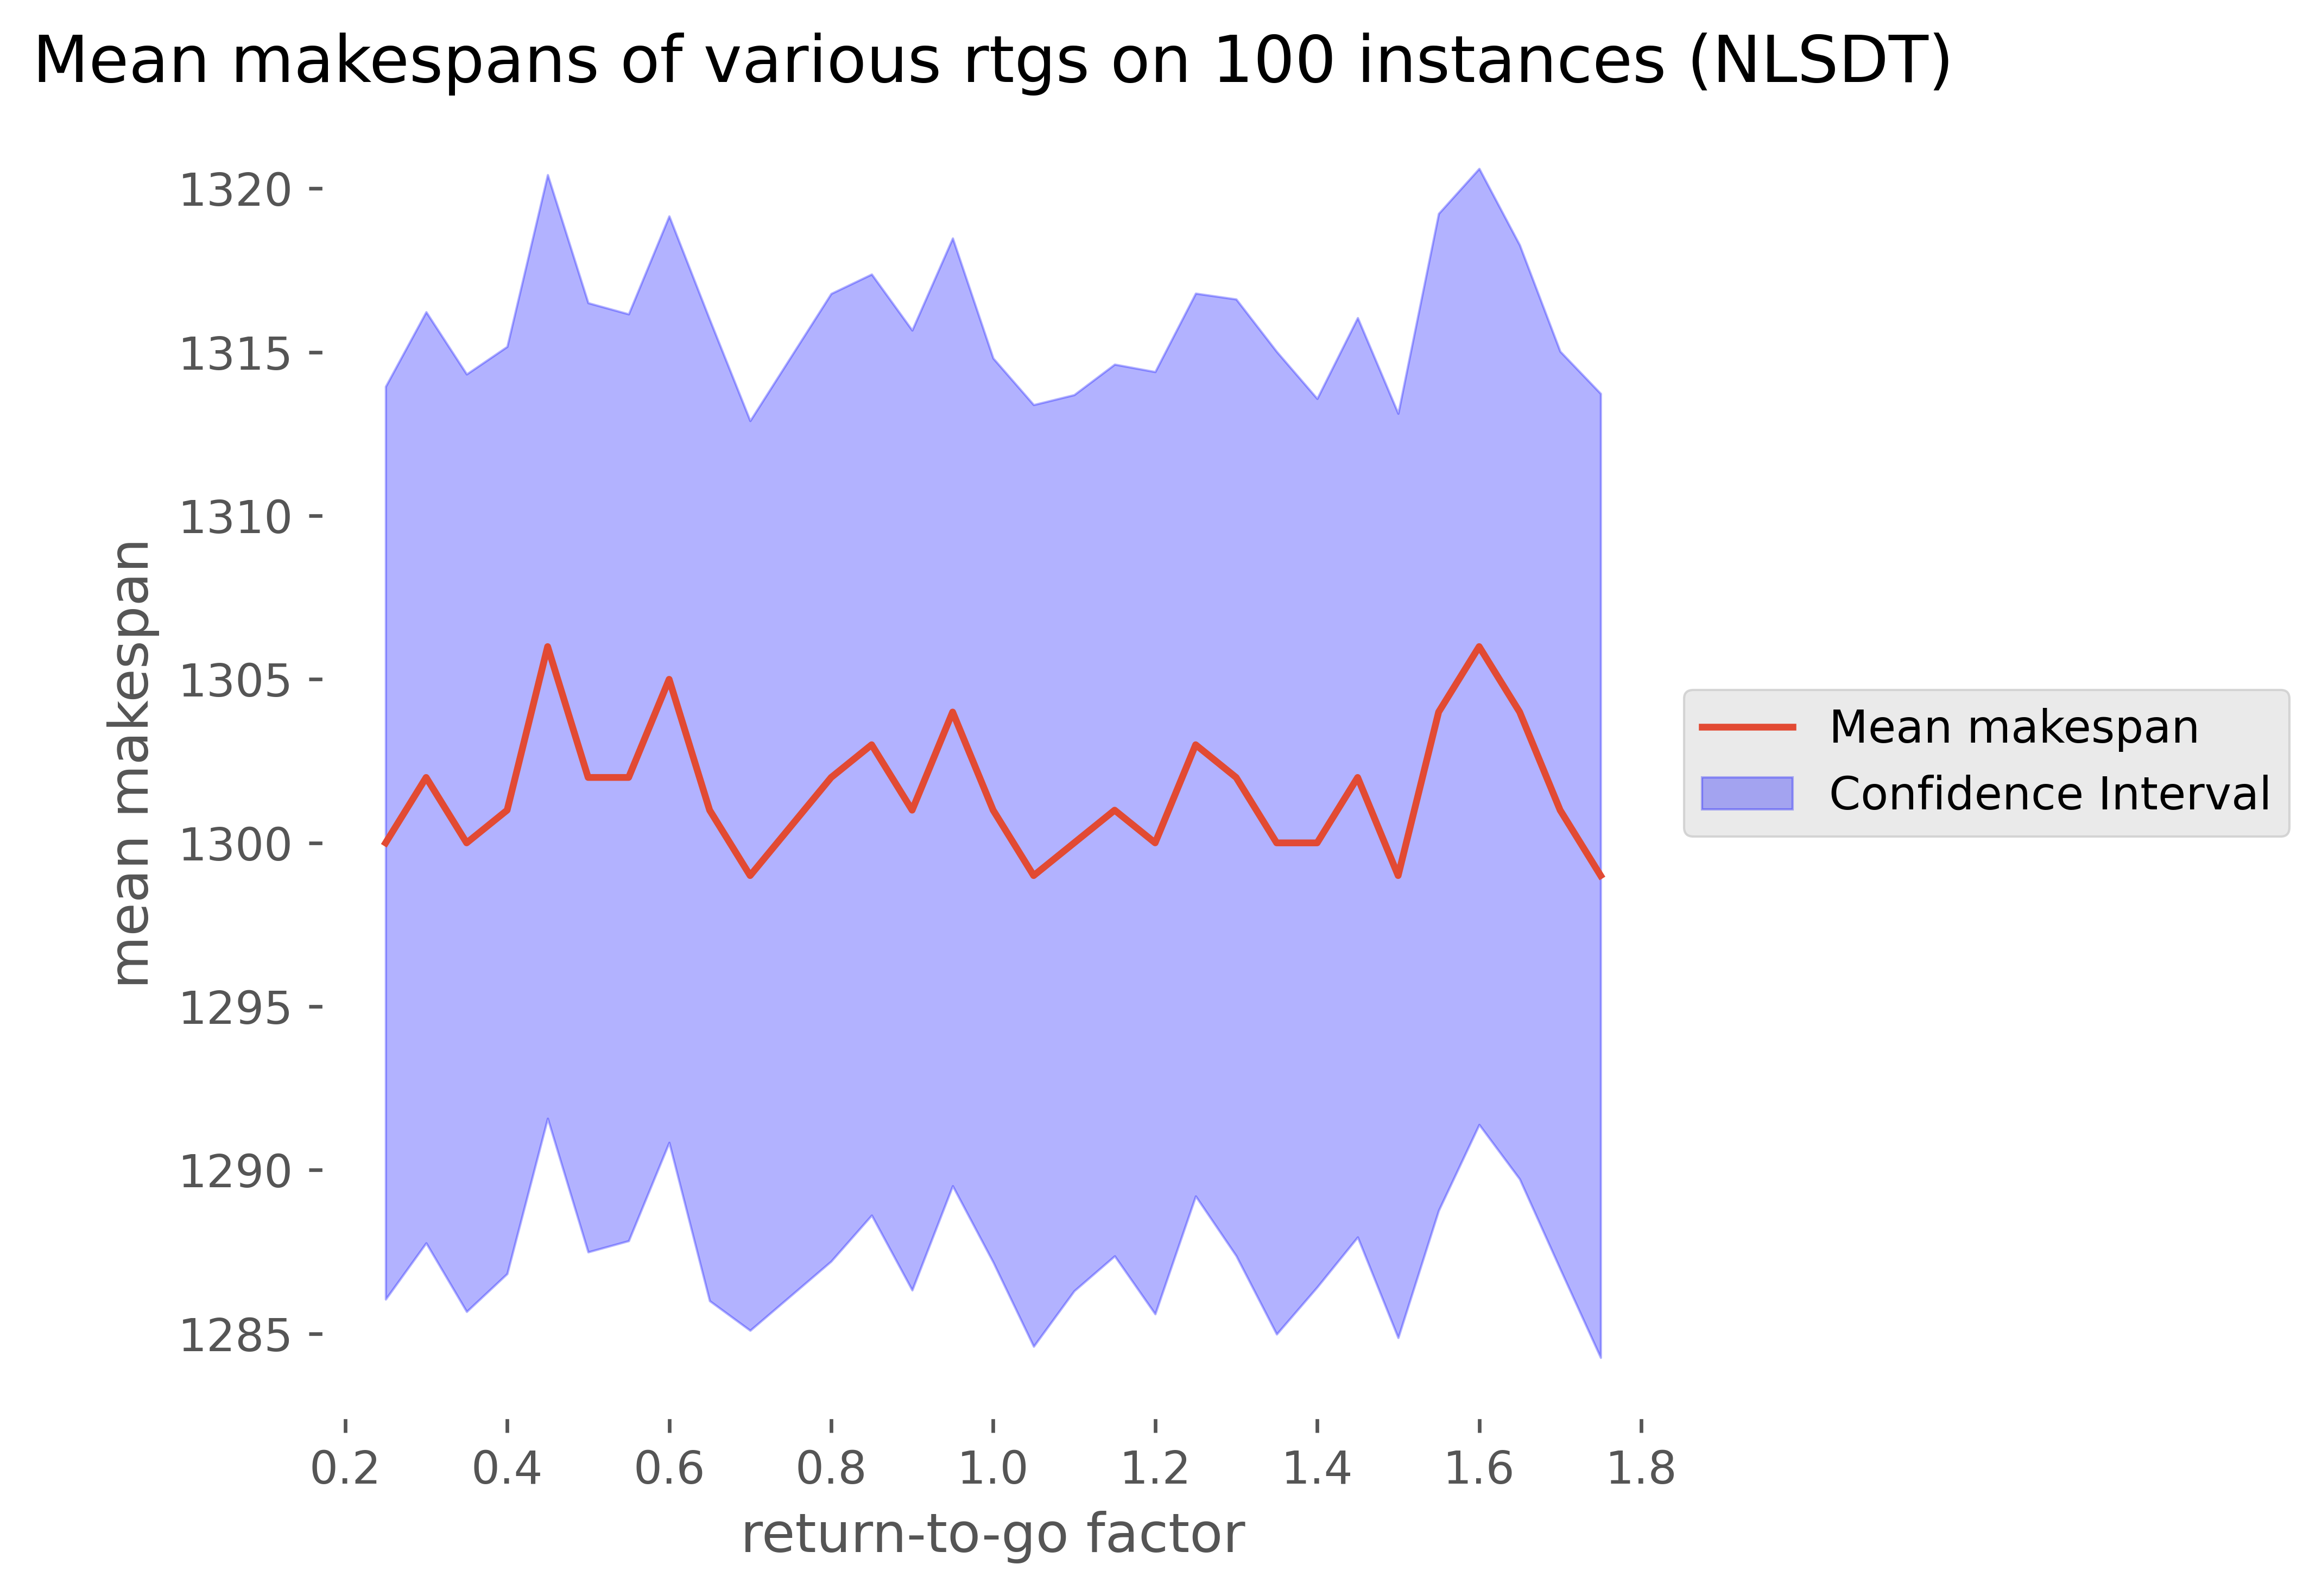

In [70]:
import matplotlib.pyplot as plt
keys = list(varied_rtg.keys())
means = [entry['mean'] for entry in varied_rtg.values()]
lower_bounds = [entry['lower_bound'] for entry in varied_rtg.values()]
upper_bounds = [entry['upper_bound'] for entry in varied_rtg.values()]
plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
plt.rcParams["figure.figsize"] = (7, 5)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
plt.plot(keys, means, label='Mean makespan')

# Filling the area between the upper and lower bounds
plt.fill_between(keys, lower_bounds, upper_bounds, color='blue', alpha=0.3, label='Confidence Interval')

# Adding labels and title
plt.xlabel('return-to-go factor')
plt.ylabel('mean makespan')
plt.title('Mean makespans of various rtgs on 100 instances (NLSDT)')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid(True)

# Show the plot
plt.savefig("15x15_conf.png")
plt.show()